In [1]:
pip install imutils


  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=1fca45da9bcb2c7a5b4ad2b5bd2b0df348c8402b9eb9a0e78454bd7da8897803
  Stored in directory: c:\users\razer rug\appdata\local\pip\cache\wheels\86\d7\0a\4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
from imutils import paths
import cv2

In [3]:
imagePaths = list(paths.list_images('F:\Data Analyst\Projects\Gender Classification\Dataset'))

In [5]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory("F:\Data Analyst\Projects\Gender Classification\Dataset\Train",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))     

validation_generator =  test_datagen.flow_from_directory( "F:\Data Analyst\Projects\Gender Classification\Dataset\Validation",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [8]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
   )
hist = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=256,
                    validation_steps=256,
                    epochs=50)

D:\anacondaPython\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
D:\anacondaPython\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
256/256 [==============================] - 1575s 6s/step - loss: 0.9044 - accuracy: 0.6056 - val_loss: 0.5647 - val_accuracy: 0.7302
Epoch 2/50
256/256 [==============================] - 1146s 4s/step - loss: 0.5236 - accuracy: 0.7423
Epoch 3/50
256/256 [==============================] - 963s 4s/step - loss: 0.4717 - accuracy: 0.7789
Epoch 4/50
256/256 [==============================] - 875s 3s/step - loss: 0.4243 - accuracy: 0.8064
Epoch 5/50
256/256 [==============================] - 847s 3s/step - loss: 0.3927 - accuracy: 0.8250
Epoch 6/50
256/256 [==============================] - 842s 3s/step - loss: 0.3621 - accuracy: 0.8413
Epoch 7/50
256/256 [==============================] - 838s 3s/step - loss: 0.3216 - accuracy: 0.8603
Epoch 8/50
256/256 [==============================] - 838s 3s/step - loss: 0.3134 - accuracy: 0.8643
Epoch 9/50
256/256 [==============================] - 836s 3s/step - loss: 0.2939 - accuracy: 0.8755
Epoch 10/50
256/256 [==========================

[0.]
 is a female


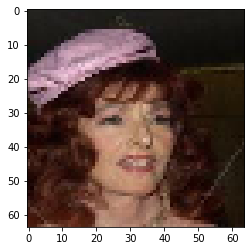

In [41]:
## Prediction time 

import numpy as np

from keras.preprocessing import image

# predicting images
path = "160001.jpg"
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("is a man")
else:
    print( " is a female")
plt.imshow(img)